# Proyecto 03 - Series de Tiempo

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

### 1. Preparación del Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
caba_data_2019 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Flujo vehicular CABA/flujo-vehicular-2019.csv', sep =',')
caba_data_2018 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Flujo vehicular CABA/flujo-vehicular-2018.csv', sep =',')
caba_data_2017 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Flujo vehicular CABA/flujo-vehicular-2017.csv', sep =',')

In [4]:
data_2019 = caba_data_2019.copy()
data_2018 = caba_data_2018.copy()
data_2017 = caba_data_2017.copy()

In [5]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [6]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


In [7]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [8]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [9]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [10]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [11]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**


In [12]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
80,2019-01-01,2,Martes,Centro,Liviano,537
86,2019-01-01,2,Martes,Centro,Pesado,1
88,2019-01-01,2,Martes,Provincia,Liviano,443
94,2019-01-01,2,Martes,Provincia,Pesado,1
149,2019-01-01,3,Martes,Centro,Liviano,769


In [13]:
dataset.shape

(238869, 6)

In [14]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [15]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [16]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
1,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00
2,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
3,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00
4,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
...,...,...,...,...,...
238864,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
238865,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
238866,Martes,Centro,Liviano,580,2019-12-31 22:00:00
238867,Martes,Centro,Liviano,214,2019-12-31 23:00:00


In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238869 entries, 0 to 238868
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   dia             238869 non-null  object        
 1   sentido         238869 non-null  object        
 2   tipo_vehiculo   238869 non-null  object        
 3   cantidad_pasos  238869 non-null  int64         
 4   fecha           238869 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 9.1+ MB


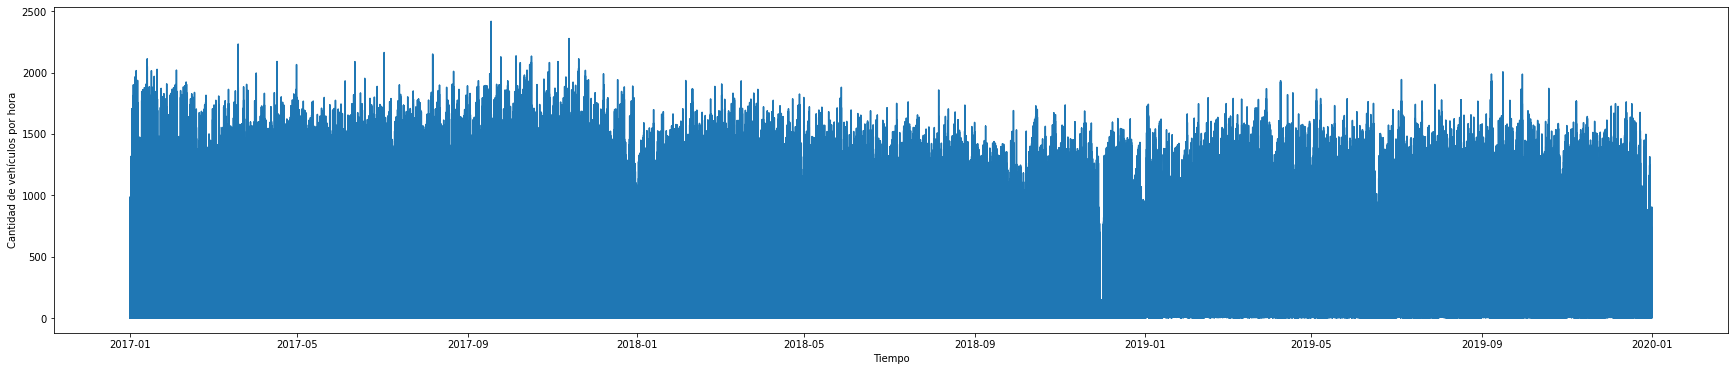

In [18]:
# Gráfico de los datos
plt.figure(figsize = (30,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de vehículos por hora')
plt.show()

In [19]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


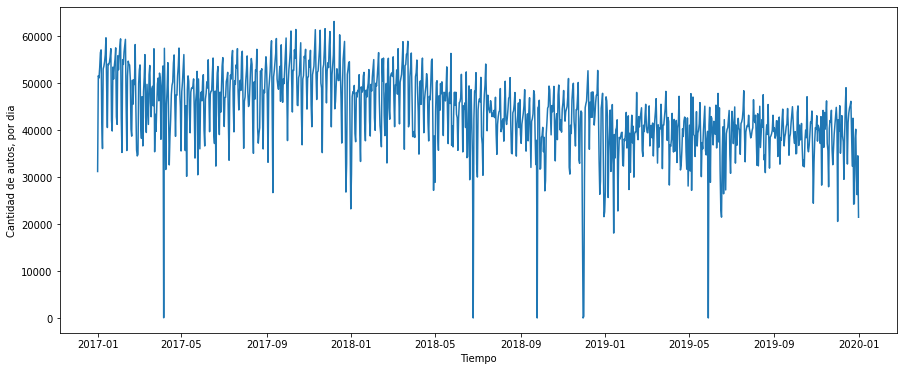

In [20]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

##Exploración de datos


* ¿Cuándo se registraron valores atípicos? ¿Es posible identificar sus causas?

In [21]:
#creo un dataframe con la media y la desviación estándar de la cantidad de pasos diarios
estad = pd.DataFrame({
                      'media': diario[['cantidad_pasos']].mean(),
                      'desv_std': diario[['cantidad_pasos']].std()
                    })

estad.transpose()

# asigno un umbral inferior y superior para poder detectar outliers
# adopto criterio de las 3 sigmas (concentra el 99.7% de los datos)

estad.loc[:,'umbral_sup'] = estad['media'] + 3 * estad['desv_std']   # agrego las filas
estad.loc[:,'umbral_inf'] = estad['media'] - 3 * estad['desv_std']   

estad.transpose()

# creación de un dataframe con los datos que quedan por encima y por debajo del umbral superior

outliers = diario[(diario['cantidad_pasos'] > estad['umbral_sup'].values[0]) |
                   (diario['cantidad_pasos'] < estad['umbral_inf'].values[0])
                   ]

print('\n= Valores atípicos =')
outliers.head(20)


= Valores atípicos =


,cantidad_pasos
fecha,
2017-04-06,40
2018-06-25,0
2018-09-25,0
2018-11-30,0
2018-12-01,350
2019-01-13,18076
2019-05-29,0


**Probables causas de los valores atípicos en la frecuencia diaria**

2017-04-06: Paro general

2018-06-25: Paro general

2018-09-25: Paro general

2018-11-30: Feriado CABA por cumbre G20

2018-12-01: Cumbre G20

2019-01-13: ? (domingo)

2019-05-29: Paro general




* ¿A qué hora suele registrarse la mayor cantidad de vehículos?

In [22]:
# se genera una serie que agrupe por promedio horario
hor = dataset.groupby(dataset["fecha"].dt.hour)["cantidad_pasos"].mean()

# se genera un dataframe a partir de la serie anterior
hor_df = pd.DataFrame({'fecha':hor.index, 'cantidad_pasos':hor.values})
hor_df

,fecha,cantidad_pasos
0,0,114.199093
1,1,98.943838
2,2,71.034905
3,3,51.664223
4,4,40.628488
5,5,48.822552
6,6,86.290241
7,7,155.252432
8,8,221.582036
9,9,240.316418


In [23]:
# Paleta de colores
enmax_palette = ["#F7CD0F", "#5FC0D5", "#F3F6F9"]
color_codes_wanted = ['amarillo', 'celeste', 'gris']
c = lambda x: enmax_palette[color_codes_wanted.index(x)]

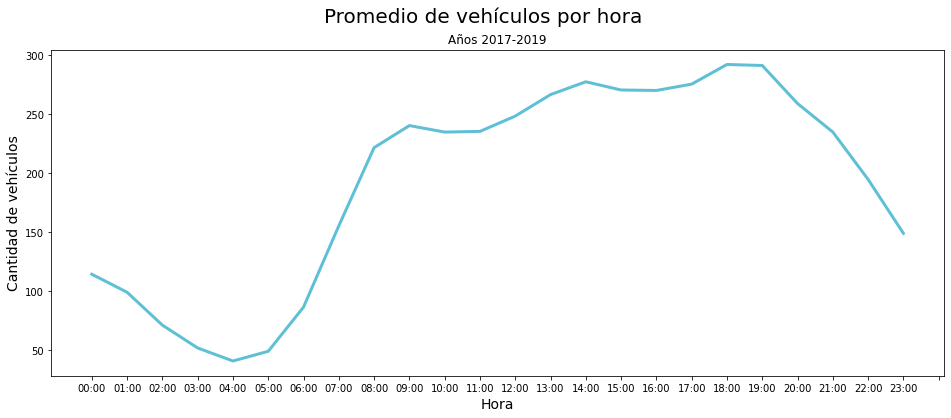

In [24]:
# Gráfico
plt.figure(figsize = (16,6))

sns.lineplot(data = hor_df, x = 'fecha', y = 'cantidad_pasos', color=c("celeste"), linewidth = 3)

plt.suptitle('Promedio de vehículos por hora', fontsize=20)
plt.title('Años 2017-2019')
plt.xlabel('Hora', fontsize = 14)
plt.ylabel('Cantidad de vehículos', fontsize = 14)

# formato hora en eje x
plt.xticks(range(0,25), [f'{i:02}:00' for i in range(24)])

plt.show()



> Se registran la mayor cantidad de vehículos entre las 18:00 y las 19:00 hs.



*   ¿En qué momento del día se producen los picos de cantidad de pasos, según el sentido de circulación?



In [25]:
dataset['horario'] = dataset['fecha'].dt.hour

ho_se = dataset.groupby(['horario', 'sentido'])['cantidad_pasos'].mean()

# se genera un dataframe a partir de la serie anterior
ho_se_df = pd.DataFrame(ho_se)


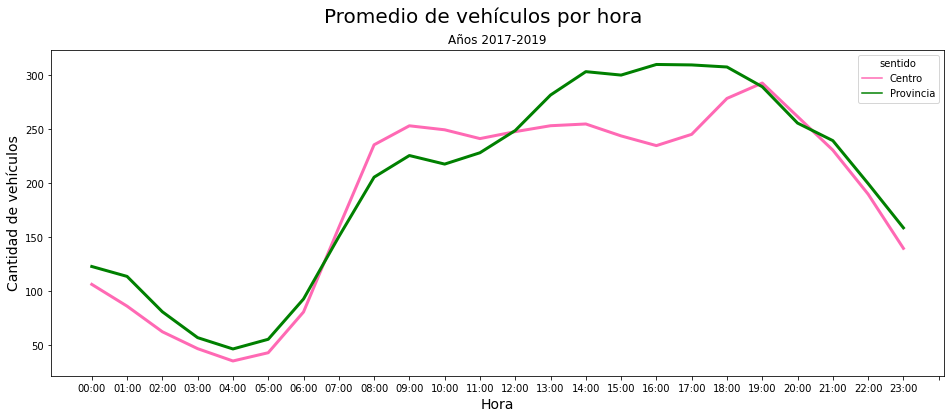

In [26]:
# Gráfico
plt.figure(figsize = (16,6))

sns.lineplot(data = ho_se_df, x = 'horario', y = 'cantidad_pasos', hue = 'sentido', palette = ['hotpink', 'g'], linewidth = 3)

plt.suptitle('Promedio de vehículos por hora', fontsize=20)
plt.title('Años 2017-2019')
plt.xlabel('Hora', fontsize = 14)
plt.ylabel('Cantidad de vehículos', fontsize = 14)

# formato hora en eje x
plt.xticks(range(0,25), [f'{i:02}:00' for i in range(24)])

plt.show()

> Sentido al centro, el pico se produce a las 19:00 hs. Sentido a provincia, a las 16:00 hs.

* ¿Existe estacionalidad en el flujo vehicular entre los distintos días de la semana?

In [27]:
ho_dia = dataset.groupby(['horario', 'dia'])['cantidad_pasos'].mean()

# se genera un dataframe a partir de la serie anterior
ho_dia_df = pd.DataFrame(ho_dia)

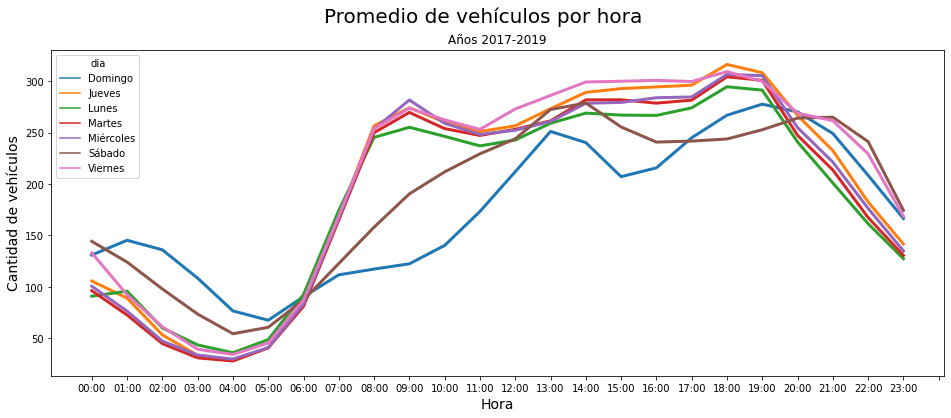

In [28]:
# Gráfico
plt.figure(figsize = (16,6))

sns.lineplot(data = ho_dia_df, x = 'horario', y = 'cantidad_pasos', hue = 'dia', linewidth = 3)

plt.suptitle('Promedio de vehículos por hora', fontsize=20)
plt.title('Años 2017-2019')
plt.xlabel('Hora', fontsize = 14)
plt.ylabel('Cantidad de vehículos', fontsize = 14)

# formato hora en eje x
plt.xticks(range(0,25), [f'{i:02}:00' for i in range(24)])

plt.show()

> Se observa un comportamiento similar de las curvas que representan el flujo vehicular de lunes a viernes.

* ¿Hay diferencias en el flujo vehicular entre aquellos que son livianos y pesados?

In [29]:
ho_tipo_dia = dataset.groupby(['horario', 'tipo_vehiculo', 'dia'])['cantidad_pasos'].mean()

# se genera un dataframe a partir de la serie anterior
ho_tipo_dia_df = pd.DataFrame(ho_tipo_dia)

ho_tipo_dia_df.head(12)

cantidad_pasos
horario tipo_vehiculo dia                      
0       Liviano       Domingo        330.533719
                      Jueves         270.260194
                      Lunes          226.223938
                      Martes         236.529070
                      Miércoles      251.076190
                      Sábado         339.750487
                      Viernes        337.721470
        Pesado        Domingo          4.812652
                      Jueves           5.093713
                      Lunes            4.276202
                      Martes           4.789141
                      Miércoles        4.336175

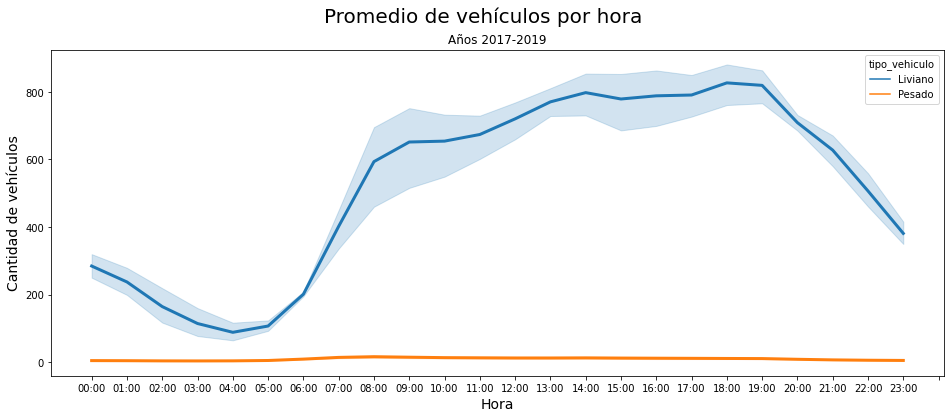

In [30]:
# Gráfico
plt.figure(figsize = (16,6))

sns.lineplot(data = ho_tipo_dia_df, x = 'horario', y = 'cantidad_pasos', hue = 'tipo_vehiculo', linewidth = 3)

plt.suptitle('Promedio de vehículos por hora', fontsize=20)
plt.title('Años 2017-2019')
plt.xlabel('Hora', fontsize = 14)
plt.ylabel('Cantidad de vehículos', fontsize = 14)

# formato hora en eje x
plt.xticks(range(0,25), [f'{i:02}:00' for i in range(24)])

plt.show()

> Las cantidades de vehículos livianos y pesados no son comparables. Se separarán en dos grupos para poder analizarlos mejor.

In [31]:
livi = dataset[dataset['tipo_vehiculo']=='Liviano']
pesa = dataset[dataset['tipo_vehiculo']=='Pesado']

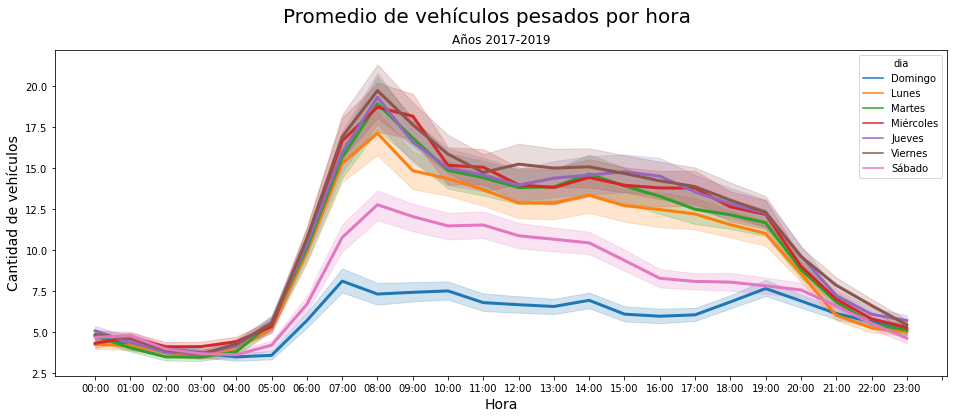

In [32]:
plt.figure(figsize = (16,6))

sns.lineplot(data = pesa, x = 'horario', y = 'cantidad_pasos', hue = 'dia', linewidth = 3)

plt.suptitle('Promedio de vehículos pesados por hora', fontsize=20)
plt.title('Años 2017-2019')
plt.xlabel('Hora', fontsize = 14)
plt.ylabel('Cantidad de vehículos', fontsize = 14)

# formato hora en eje x
plt.xticks(range(0,25), [f'{i:02}:00' for i in range(24)])

plt.show()

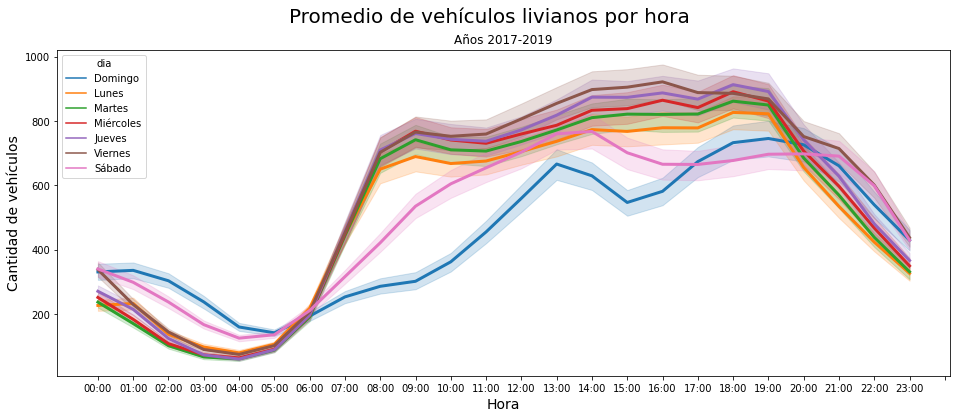

In [33]:
plt.figure(figsize = (16,6))

sns.lineplot(data = livi, x = 'horario', y = 'cantidad_pasos', hue = 'dia', linewidth = 3)

plt.suptitle('Promedio de vehículos livianos por hora', fontsize=20)
plt.title('Años 2017-2019')
plt.xlabel('Hora', fontsize = 14)
plt.ylabel('Cantidad de vehículos', fontsize = 14)

# formato hora en eje x
plt.xticks(range(0,25), [f'{i:02}:00' for i in range(24)])

plt.show()

> El pico de circulación de vehículos pesados se produce a la mañana, mientras que el de los livianos ocurre durante las 16:00 y las 19:00 hs.

###Autocorrelación

In [34]:
from statsmodels.tsa.stattools import acf

nlags =  52*20
autocorr = acf(diario['cantidad_pasos'], nlags = nlags)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


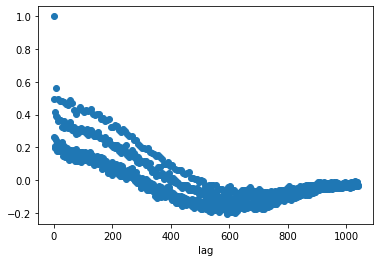

In [35]:
plt.scatter(np.arange(nlags+1), autocorr)
plt.xlabel('lag')
plt.show()

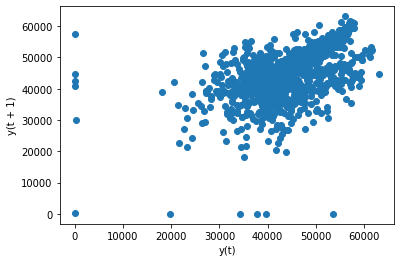

In [36]:
pd.plotting.lag_plot(diario['cantidad_pasos'], lag=1)
plt.show()

Text(0.5, 0, 'lag')

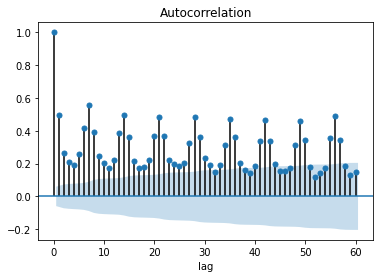

In [37]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(diario['cantidad_pasos'], lags=60)
plt.xlabel('lag')

Text(0.5, 0, 'lag')

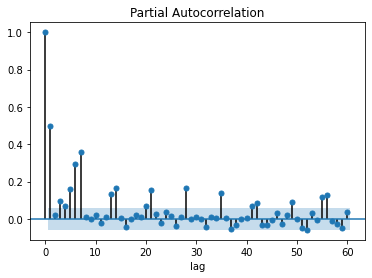

In [38]:
# función de autocorrelación parcial

plot_pacf(diario["cantidad_pasos"], lags= 60)
plt.xlabel('lag')

En aquellos puntos que se encuentran fuera de la zona sombreada, se puede afirmar con un 95% de confianza que existe autocorrelación y no una mera casualidad.

### Descomposición de series - Statsmodels

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [40]:
result = seasonal_decompose(diario['cantidad_pasos'], model = 'additive')

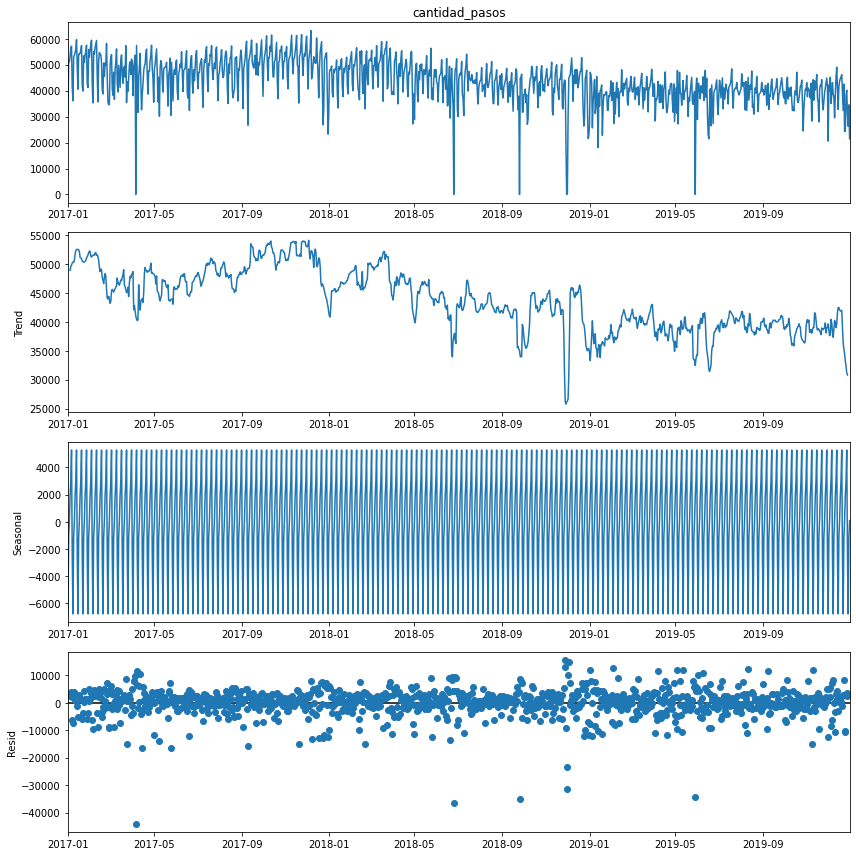

In [41]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12,12]
result.plot()
plt.show()

Histograma de residuos

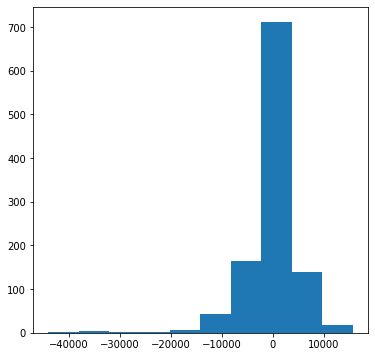

In [42]:
matplotlib.rcParams['figure.figsize'] = [6,6]
plt.hist(result.resid)
plt.show()

## Predicción a futuro

#### · **Modelo Benchmark** (predicción del valor futuro en base al valor de la fecha anterior)



In [ ]:
1 - (diario.iloc[-92:, :].shape[0] / diario.shape[0])

Observations: 1095
Training Observations: 1001
Testing Observations: 94


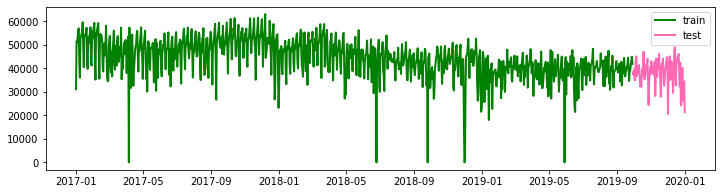

In [43]:
diario.cantidad_pasos = diario.cantidad_pasos.dropna()
train_size = int(len(diario.cantidad_pasos) * 0.915)
train, test = pd.DataFrame(diario.cantidad_pasos[0:train_size]), pd.DataFrame(diario.cantidad_pasos[train_size:len(diario.cantidad_pasos)])
print('Observations: %d' % (len(diario.cantidad_pasos)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

plt.figure(figsize = (12, 3))
plt.plot(train.index, train.cantidad_pasos,
         color='g', lw=2, label="train")
plt.plot(test.index, test.cantidad_pasos,
         color='hotpink', lw=2, label="test")
plt.legend()
plt.show()

In [44]:
look_back = 90  #cantidad de datos para predecir el valor siguiente

N = diario.cantidad_pasos.shape[0]

X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)

for i in range(X.shape[0]):
#     X[i,:] = senial.values.iloc[i:i+look_back]
#     y[i] = senial.values.iloc[i+look_back]
    X[i,:] = diario.cantidad_pasos.iloc[i:i+look_back]
    y[i] = diario.cantidad_pasos.iloc[i+look_back]

N_train = len(train.cantidad_pasos) - look_back     #cantidad de instancias que vamos para entrenar
N_test = len(test.cantidad_pasos)                   #cantidad de puntos para evaluar
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(911, 90) (911,)
(93, 90) (93,)


In [45]:
diario.cantidad_pasos.index[N_train+look_back: length_total]

DatetimeIndex(['2019-09-29', '2019-09-30', '2019-10-01', '2019-10-02',
               '2019-10-03', '2019-10-04', '2019-10-05', '2019-10-06',
               '2019-10-07', '2019-10-08', '2019-10-09', '2019-10-10',
               '2019-10-11', '2019-10-12', '2019-10-13', '2019-10-14',
               '2019-10-15', '2019-10-16', '2019-10-17', '2019-10-18',
               '2019-10-19', '2019-10-20', '2019-10-21', '2019-10-22',
               '2019-10-23', '2019-10-24', '2019-10-25', '2019-10-26',
               '2019-10-27', '2019-10-28', '2019-10-29', '2019-10-30',
               '2019-10-31', '2019-11-01', '2019-11-02', '2019-11-03',
               '2019-11-04', '2019-11-05', '2019-11-06', '2019-11-07',
               '2019-11-08', '2019-11-09', '2019-11-10', '2019-11-11',
               '2019-11-12', '2019-11-13', '2019-11-14', '2019-11-15',
               '2019-11-16', '2019-11-17', '2019-11-18', '2019-11-19',
               '2019-11-20', '2019-11-21', '2019-11-22', '2019-11-23',
      

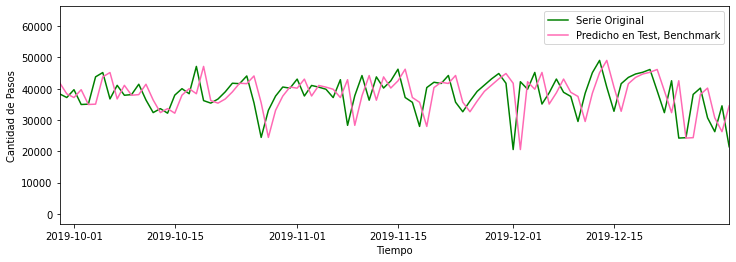

In [50]:
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]

plt.figure(figsize=(12,4))
plt.plot(diario.cantidad_pasos.index[:length_total], diario.cantidad_pasos[:length_total], color = 'g', label = 'Serie Original')
plt.plot(diario.cantidad_pasos.index[N_train+look_back: length_total], y_test_pred_benchmark, color='hotpink', label = 'Predicho en Test, Benchmark')
plt.xlim(diario.cantidad_pasos.index[N_train+look_back], diario.cantidad_pasos.index[length_total-1])
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.legend()
plt.show()

In [52]:
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 2]

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_test_pred_benchmark)

print('Error en Test en Benchmark:',np.sqrt(mse))

Error en Test en Benchmark: 6784.179095513326


#### · **One-step prediction** (predicción del valor futuro entrenando un RandomForestRegressor)

In [53]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs = 4).fit(X_train,y_train)

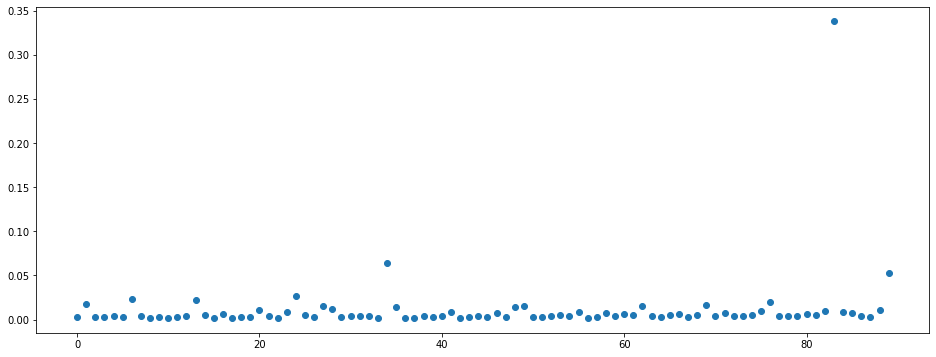

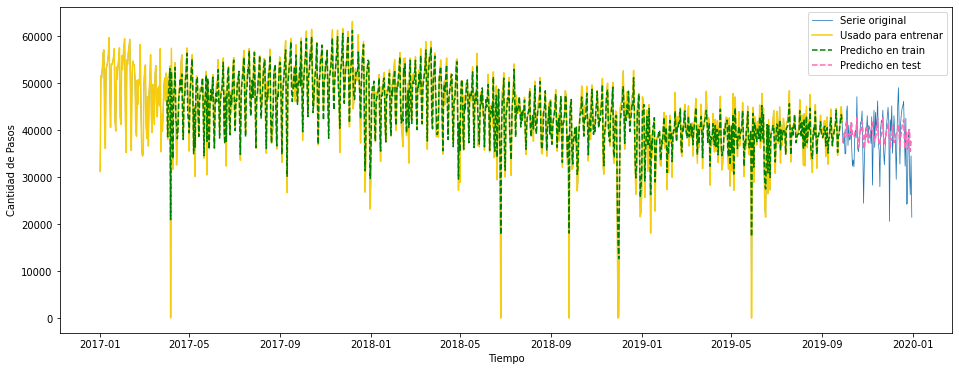

In [61]:
plt.figure(figsize = (16,6))
plt.scatter(np.arange(rf.feature_importances_.size),rf.feature_importances_)

y_pred = rf.predict(X)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

plt.figure(figsize=(16,6))
plt.plot(diario.cantidad_pasos.index[:length_total], diario.cantidad_pasos[:length_total], lw = 0.75, label = 'Serie original')
plt.plot(diario.cantidad_pasos.index[:N_train + look_back], diario.cantidad_pasos[:N_train + look_back], color=c("amarillo"), label = 'Usado para entrenar')
plt.plot(diario.cantidad_pasos.index[look_back: look_back + N_train], y_train_pred,'--', color = 'g', label = 'Predicho en train')
plt.plot(diario.cantidad_pasos.index[N_train+look_back: length_total-1], y_test_pred,'--', color = 'hotpink', label = 'Predicho en test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de Pasos')
plt.show()

In [66]:
print('Error en Train:',np.sqrt(mse))

mse = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(mse))

Error en Train: 6784.179095513326
Error en Test: 4906.3930592279075


#### · **Multi-step prediction** 

In [67]:
y_ms_test_pred = []
x = X_test[0,:] # primera instancia del conjunto test
for i in range(y_test.size):
    y_os_pred = rf.predict(x.reshape(1,-1))
    y_ms_test_pred.append(y_os_pred)
    x = np.append(x[1:], y_os_pred)
y_ms_test_pred = np.array(y_ms_test_pred)

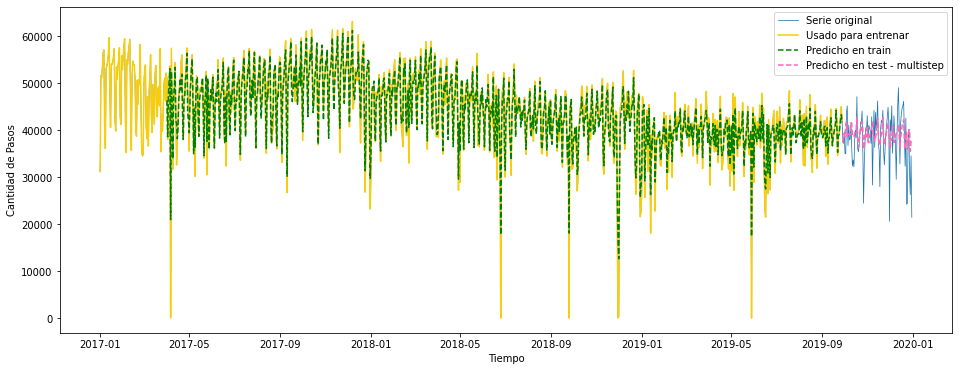

In [68]:
plt.figure(figsize=(16,6))
plt.plot(diario.cantidad_pasos.index[:length_total], diario.cantidad_pasos[:length_total], lw = 0.75, label = 'Serie original')
plt.plot(diario.cantidad_pasos.index[:N_train + look_back], diario.cantidad_pasos[:N_train + look_back], color=c("amarillo"), label = 'Usado para entrenar')
plt.plot(diario.cantidad_pasos.index[look_back: look_back + N_train], y_train_pred,'--', color = 'g', label = 'Predicho en train')
plt.plot(diario.cantidad_pasos.index[N_train+look_back: length_total-1], y_test_pred,'--', color = 'hotpink', label = 'Predicho en test - multistep')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de Pasos')
plt.show()

In [69]:
mse_ms = mean_squared_error(y_test, y_ms_test_pred)
print('Error en Test:',np.sqrt(mse_ms))

Error en Test: 5231.178949413516


Tomando como criterio de comparación para definir un modelo de predicción el error cuadrático medio, se optaría por elegir One-step prediction, debido a que arroja el menor error cuadrático medio.